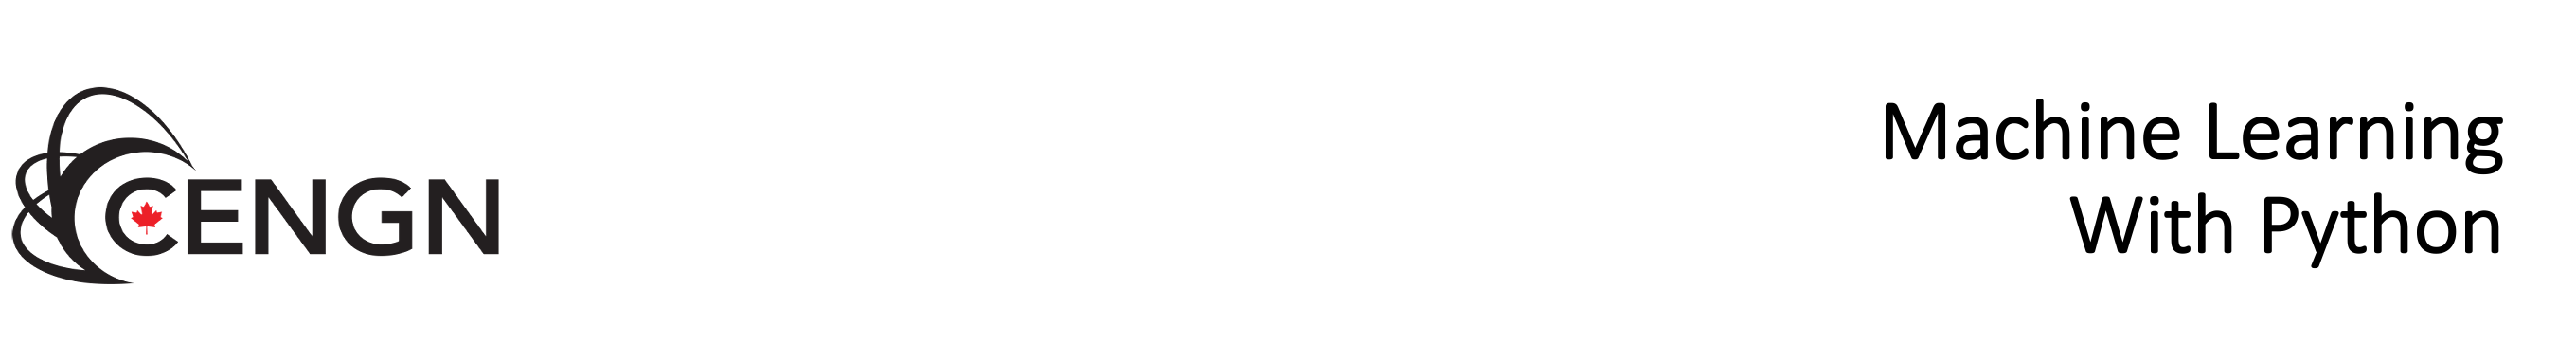
___

# **Lab 1 - PCA and t-SNE**


**Step 1: Importing Libraries**

Import all relevant libraries and algorithms.

In [1]:
# Import relevant libraries

from __future__ import print_function
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import algorithms from Sklearn

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**Step 2: Importing the Dataset**

Note that the images are all 28 by 28 pixels and the images are in greyscale. Therefore, the data pertaining to each observation corresponds to  28×28=784  features or dimensions, and each feature corresponds to the intensity of the pixel. 

In [2]:
# Load MNIST dataset using pandas

df = pd.read_csv('mnist_784_subset.csv')

After importing the data, be sure to view a few rows of the data, and check its shape and datatypes. 

In [3]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8


In [4]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000424,0.000293,0.000060,0.000096,0.000024,0.0,0.0,0.0,0.0,4.425800
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016480,0.014607,0.003285,0.009569,0.002431,0.0,0.0,0.0,0.0,2.899782
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.992157,0.250980,0.956863,0.243137,0.0,0.0,0.0,0.0,9.000000


In [5]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (10000, 785)


In [6]:
df.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
class       int64
Length: 785, dtype: object

**Note:** The PCA technique performs better on normalized and numeric data. The `describe()` output shows that the data is all numeric and all normalized (values lie between 0 and 1).

**Step 3: Defining the Variables**

In [7]:
# Define variables

X = df.drop('class',axis=1)
y = df['class']

# Inspect the shape of the data

print(X.shape, y.shape)

(10000, 784) (10000,)


In [8]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [9]:
y

0       6
1       7
2       5
3       7
4       8
       ..
9995    6
9996    4
9997    5
9998    2
9999    8
Name: class, Length: 10000, dtype: int64

**Step 4: Visualizing the Dataset**

Before we dig into dimensionality reduction and image recognition, let us get a sense of how the images look and what the task ahead of us is.

In [10]:
# View the columns' names

df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

In [11]:
# Define an array with names features

feat_cols = X.columns
feat_cols

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

MNIST dataset is an ordered dataset with images sorted by the labels. Randomizing the dataset is important. It allows selecting a random sample that gives a real representation of the dataset. A random seed allows for reproducible randomization.
 
**Note:** The random seed can be any number.

<Figure size 432x288 with 0 Axes>

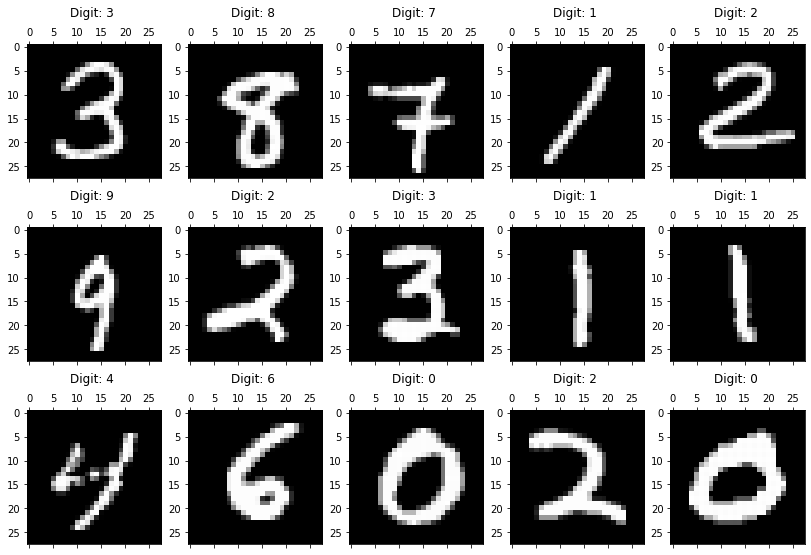

In [12]:
# Set a random seed for reproducibility of code using NumPy

np.random.seed(10)
rndperm = np.random.permutation(df.shape[0])

# Plot 15 images to get a sense of how the images look like

plt.gray()
fig = plt.figure( figsize=(16,12) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,  # 3 rows, 5 columns
                         i+1,
                         title="Digit: {} \n"  # Set a title for each image with its label 
                         .format(str(df.loc[rndperm[i],'class'])) )  #
    
    ax.matshow(df.loc[rndperm[i],feat_cols]
               .values
               .reshape((28,28))  # Reformat each observation (image) to its original 28x28 shape
               .astype(float)
              )
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.7) 
    
plt.show()

**Step 5: Reducing the Dimensions in Data**

In [13]:
# Run PCA with three components 

pca = PCA(n_components=3)       
pca_result = pca.fit_transform(df[feat_cols].values)

# Add the PCA components as columns (features) to the dataframe

df['First Principal Component'] = pca_result[:,0]  # Select the first column
df['Second Principal Component'] = pca_result[:,1]  # Select the second column
df['Third Principal Component'] = pca_result[:,2]

# Compute the amount of variation 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09862132 0.07236824 0.06289581]


Based on the obtained variance ratio, the first, second, and third components explain around 10%, 7%, and 6% of the variation across observations respectively.

The three principal components, put together, are able to explain around 23% of the variation in the dataset.

In [14]:
# View the PCA components

pca_result

array([[ 3.88198345,  1.75235064,  0.07212854],
       [-2.34986151,  2.2061296 , -2.12294161],
       [-1.17082709, -1.1273351 ,  2.04783921],
       ...,
       [-0.40073054,  1.23909288,  2.51718872],
       [-0.43855931, -1.0072638 , -0.0450079 ],
       [ 1.69850537, -0.88357368, -2.31765729]])

In [15]:
# View first 5 rows in data 
# Note the three PCA components added as columns to the dataset

df.head().T

,0,1,2,3,4
pixel1,0.000000,0.000000,0.000000,0.000000,0.000000
pixel2,0.000000,0.000000,0.000000,0.000000,0.000000
pixel3,0.000000,0.000000,0.000000,0.000000,0.000000
pixel4,0.000000,0.000000,0.000000,0.000000,0.000000
pixel5,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
pixel784,0.000000,0.000000,0.000000,0.000000,0.000000
class,6.000000,7.000000,5.000000,7.000000,8.000000
First Principal Component,3.881983,-2.349862,-1.170827,-1.175033,1.275850
Second Principal Component,1.752351,2.206130,-1.127335,1.701116,-0.862820


Note that the components are the new features derived by the PCA algorithm.

**Step 6: Visualizing the PCA Results**

Let us now visualize whether the first two components (which explain 17% of variation in the dataset) are able to distinguish the digits from one another. 

To do so, we obtain a scatter plot of the first two principal components using different colours for each digit. If different digits are fairly well separated by the principal component values, that would imply the PCA is able to capture information that distinguishes digits from one another. 

Let us plot the first two principal components against each other to observe whether they are sufficient to separate the digits from one another.

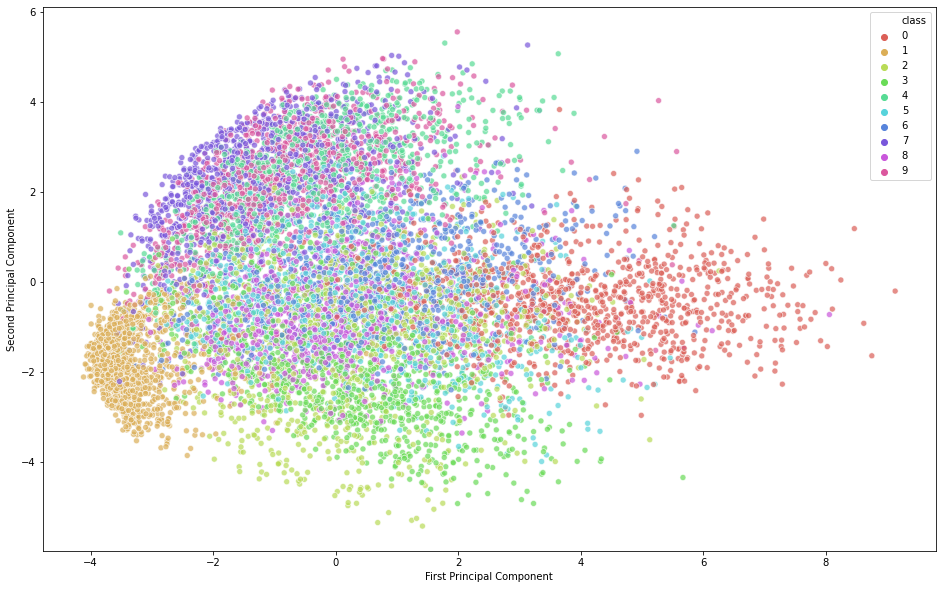

In [16]:
# Scatter plot of the first two PCA components

plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "First Principal Component", y="Second Principal Component",
    hue ="class", # Set the variable that defines the clusters
 #   style ="y",
    palette = sns.color_palette("hls", 10),
    data = df.loc[rndperm,:],   # Set the dataframe with permutated rows
    legend = "full",   # Every group/cluster will get an entry in the legend
    alpha = 0.7    # Set opacity of the points
)


The plot above shows the clusters identified by the PCA two-component approach. A few numbers can be clearly distinguished from the others (0, 1, and 4). However, the other numbers are not clearly distinguishable.

Let us now consider another dimensionality reduction technique, t-distributed stochastic neighbor embedding (t-SNE).

**Step 7: Applying t-SNE**

**Note:** t-SNE takes relatively long to terminate. Wait for sufficient time for code to terminate.

In [17]:
# Track time of the t-SNE algorithm run

time_start = time.time()

# Run t-SNE with two components

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#tsne_results = tsne.fit_transform(data_subset)
tsne_results = tsne.fit_transform(X)

# Print termination message when t-SNE terminates

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.239s...
[t-SNE] Computed neighbors for 10000 samples in 147.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.127102
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.826462
[t-SNE] KL divergence after 300 iterations: 2.806357
t-SNE done! Time elapse

**Step 8: Visualizing the t-SNE Results**

Let us visualize the two t-SNE components using a scatter plot as we did previously for the results of the PCA. 

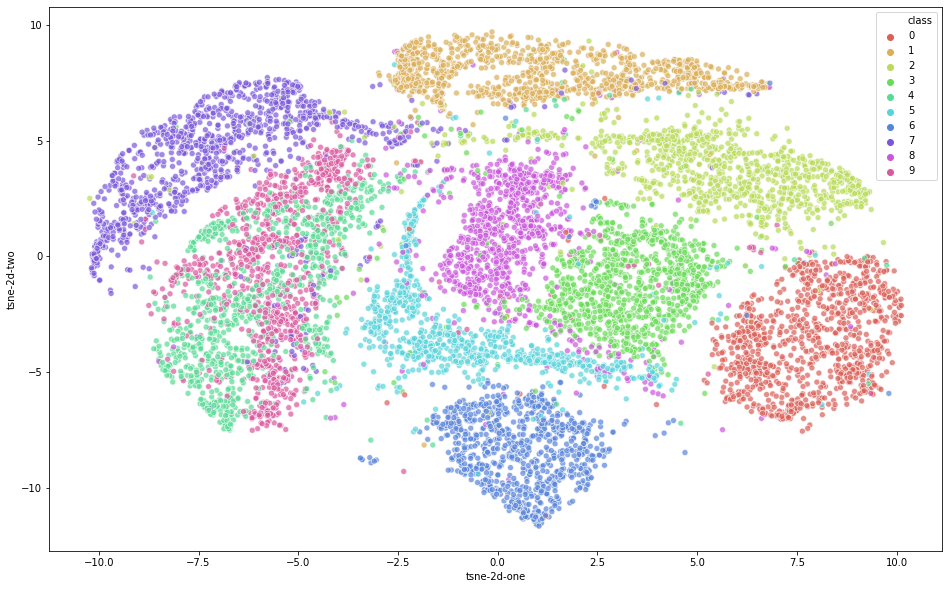

In [18]:
# Visualize t-SNE  in a scatter plot

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.7
)
#sns.set(font_scale = 12)
#sns.set_xticklabels(sns.get_xmajorticklabels(), fontsize = 18)
#plot.set_yticklabels(plot.get_yticks(), size = 3)
#plt.show()

t-SNE appears to perform remarkably well with this dataset. Almost all of the digits are very clearly separated into distinct clusters, except for 4s and 9s which the model was not able to clearly distinguish.

Using these two dimensions identified by the t-SNE technique as inputs to a clustering algorithm such as K-Means or a mixture model will itself result in an image recognition algorithm that is able to recognize handwritten digits with good accuracy.

**Step 9: Comparing PCA and t-SNE Results**

Let us compare the results of the PCA and the t-SNE side by side.

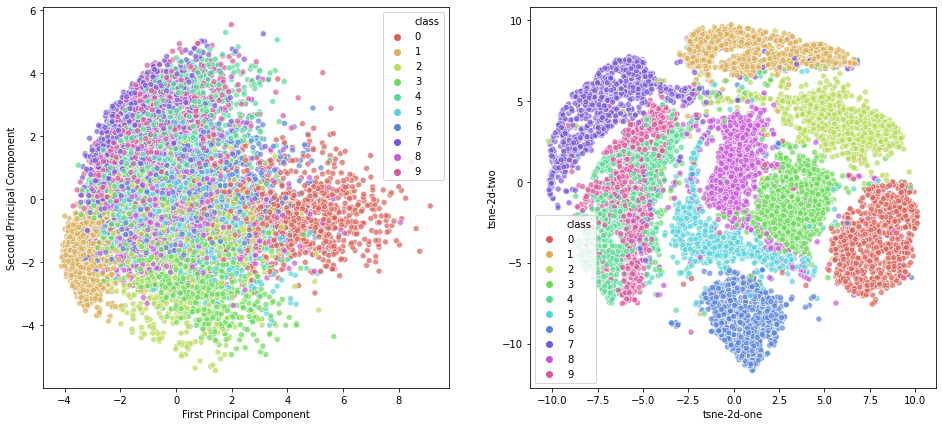

In [19]:
# Compare the PCA and t-SNE results visually 

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)

# Scatter plot for PCA 

sns.scatterplot(
    x="First Principal Component", y="Second Principal Component",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.7,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)

# Scatter plot for t-SNE 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.7,
    ax=ax2
)

Don't forget to check the results of this lab on the LMS.

# Exercise

Run an SVM classifier on the t-SNE components and evaluate the model's performance.

**Define the Variables**

In [27]:
# Set X as the t-SNE components (tsne-2d-one and tsne-2d-two) and y as the 'class' feature
# Hint: Convert the two t-SNE components into dataframes then use concat() method to combine both in one dataframe
tsne_2d_one = df['tsne-2d-one']
tsne_2d_two = df['tsne-2d-two']
X_svm = pd.concat([tsne_2d_one,tsne_2d_two], axis=1)
y_svm = df['class']
display(X_svm)
display(y_svm)

,tsne-2d-one,tsne-2d-two
0,1.402032,-10.613814
1,-8.224123,2.248989
2,-2.015823,-2.413583
3,-5.298238,6.693152
4,-0.493880,-1.553725
...,...,...
9995,1.032221,-7.923988
9996,1.423994,6.745366
9997,-2.345917,0.825828
9998,5.556947,3.568249


0       6
1       7
2       5
3       7
4       8
       ..
9995    6
9996    4
9997    5
9998    2
9999    8
Name: class, Length: 10000, dtype: int64

In [32]:
# Split data into training and test sets with a 70-30 split and random_state = 109
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 2)

(3000, 2)

(7000,)

(3000,)

In [42]:
# Import svm model from Sklearn and run the SVM classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
results = svm_model.predict(X_test)
display(results)

array([0, 7, 2, ..., 4, 7, 7])

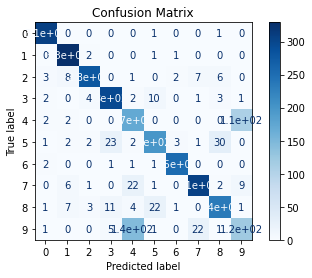

In [45]:
# Plot the confusion matrix
# Hint: Recall that this dataset has 10 classes
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, results)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(svm_model, 
                             X_test, 
                             y_test,    
                             display_labels=["0","1","2","3","4","5","6","7","8","9"],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

The confusion matrix should show that the model fails to predict a large number of the '9' and '4' images which was revealed in the t-SNE output figure. 118 of the '4' images were classified as '9' and 132 of the '9' images were classified as '4.' 
Similarly, the model failed to classify some of the '5' and '3' images. It classified  60 of the '5' images as '3' and 32 of the '3' images as '5.'

The model performs really well on the rest of the images.

In [40]:
# Obtain the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, results)

0.8156666666666667

In [46]:
# Obtain the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, results, labels=[0,1,2,3,4,5,6,7,8,9], target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       310
           1       0.93      0.99      0.96       333
           2       0.96      0.91      0.93       306
           3       0.88      0.93      0.90       319
           4       0.49      0.60      0.54       283
           5       0.84      0.76      0.80       262
           6       0.97      0.98      0.98       259
           7       0.91      0.88      0.89       347
           8       0.85      0.82      0.83       285
           9       0.50      0.41      0.45       296

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



### About the MNIST Dataset

As mentioned in the Lab overview, the MNIST dataset contains 70,000 images.

To keep the computation time below reasonable limits, we created a subset of the MNIST dataset consisting of 10,000 randomly selected observations using the code below:

For your reference, you could access the entire MNIST dataset directly by loading it from from https://www.openml.org/d/554 using the dataset's name and version number as shown in the command below: 

df = fetch_openml('mnist_784', version=1, cache=True)

## Switch to LMS

Switch to LMS to view labs results and then complete the last section in this course; Section 5.4 (Additional Topics Relating to ML Applications).